In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Multi-Dimensional Gradient Descent

Imagine you are standing on a hillside in a thick fog, and you want to get to the lowest point. You can't see the valley, but you can feel the slope of the ground under your feet. The most straightforward strategy is to take a step in the steepest downhill direction, and then repeat the process. This is the core idea behind gradient descent.

In the previous lecture, we explored this concept in one dimension. Now, we will extend this powerful optimization technique to multiple dimensions.

In multi-dimensional optimization, our goal is to find the minimum of a function $f(\mathbf{x})$ where $\mathbf{x}$ is a vector of variables, i.e., $\mathbf{x} = (x_1, x_2, \dots, x_n)$.

The gradient of a multi-dimensional function, denoted as $\nabla f(\mathbf{x})$, is a vector of its partial derivatives:
$$ \nabla f(\mathbf{x}) = \left( \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \dots, \frac{\partial f}{\partial x_n} \right) $$
The gradient vector points in the direction of the steepest *ascent* of the function at a given point. To go downhill, we move in the opposite direction, the negative gradient, $-\nabla f(\mathbf{x})$.

The gradient descent algorithm for multiple dimensions iteratively updates our position vector $\mathbf{x}$ by taking a step in the direction of the negative gradient:
$$ \mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \nabla f(\mathbf{x}_k) $$
where $\alpha$ is the **learning rate**, a scalar that determines the size of our step.

Let's start by defining a function that we want to minimize. We will use a simple two-dimensional "bowl" shape for our first illustration.


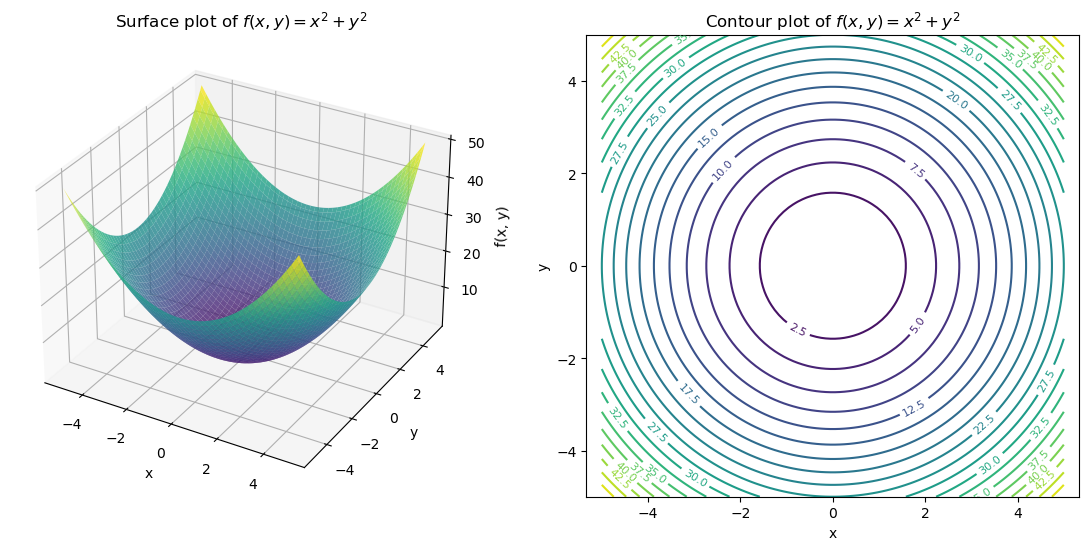

In [45]:
# Define the function f(x, y) = x^2 + y^2
def f(x, y):
    return x**2 + y**2

# Create a grid of x and y values
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create a 3D surface plot
fig = plt.figure(figsize=(14, 6))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.set_title('Surface plot of $f(x, y) = x^2 + y^2$')

# Create a contour plot
ax2 = fig.add_subplot(1, 2, 2)
contour = ax2.contour(X, Y, Z, levels=20, cmap='viridis')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Contour plot of $f(x, y) = x^2 + y^2$')
ax2.clabel(contour, inline=True, fontsize=8)
ax2.axis('equal')
plt.show()

## The Gradient

The gradient of a function indicates the direction of the steepest ascent. For our function $f(x, y) = x^2 + y^2$, the partial derivatives are:
$$ \frac{\partial f}{\partial x} = 2x $$
$$ \frac{\partial f}{\partial y} = 2y $$
So, the gradient is:
$$ \nabla f(x, y) = (2x, 2y) $$

Let's compute and visualize the gradient. The code below calculates the gradient at various points and plots the gradient vectors on the contour plot. The arrows point in the direction of the steepest increase of the function. Notice that the gradient vectors are always perpendicular to the contour lines.

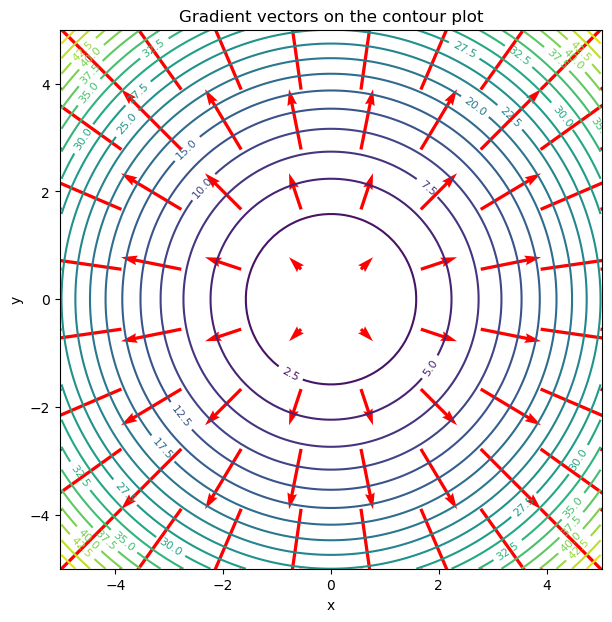

In [46]:
# Define the gradient of f(x, y)
def grad_f(x, y):
    return np.array([2*x, 2*y])

# Create a grid of points to evaluate the gradient
x_grad = np.linspace(-5, 5, 10)
y_grad = np.linspace(-5, 5, 10)
X_grad, Y_grad = np.meshgrid(x_grad, y_grad)
GX, GY = grad_f(X_grad, Y_grad)

# Plot the contour and the gradient vectors
plt.figure(figsize=(7, 7))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.quiver(X_grad, Y_grad, GX, GY, color='red', scale=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient vectors on the contour plot')
plt.clabel(contour, inline=True, fontsize=8)
plt.axis('equal')
plt.show()

## Gradient Descent Algorithm

Now we'll implement the gradient descent algorithm to find the minimum of our function. We start at an initial point $(x_0, y_0)$ and iteratively move in the direction opposite to the gradient.

The update rule is:
$$ (x_{k+1}, y_{k+1}) = (x_k, y_k) - \alpha \nabla f(x_k, y_k) $$
where $\alpha$ is the learning rate.

In [47]:
def gradient_descent(grad_f, start, alpha, n_iter):
    """
    Performs gradient descent to find the minimum of a function.
    
    Args:
        grad_f: A function that computes the gradient.
        start: The starting point (x, y).
        alpha: The learning rate.
        n_iter: The number of iterations.
        
    Returns:
        A list of points visited during the descent.
    """
    path = [start]
    x = np.array(start)
    for _ in range(n_iter):
        grad = grad_f(x[0], x[1])
        x = x - alpha * grad
        path.append(x)
    return np.array(path)

## Visualizing the Descent

Let's run the gradient descent algorithm and visualize its path on the contour plot. We'll start at the point $(4, 4)$ and use a learning rate of $\alpha = 0.1$.

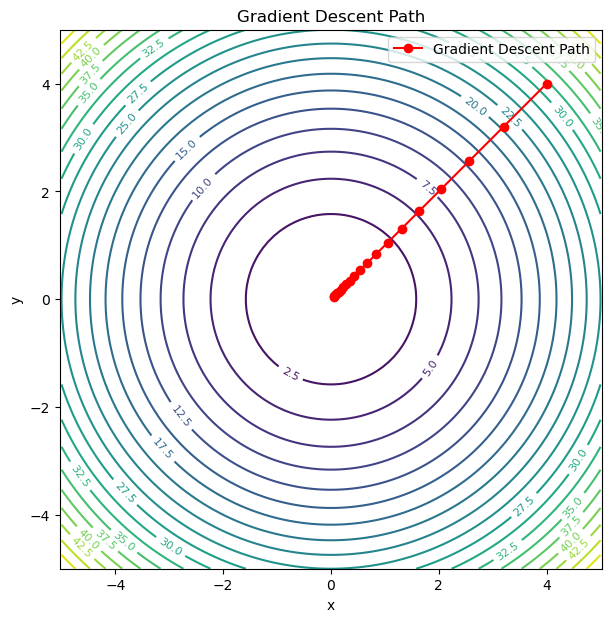

In [48]:
# Run gradient descent
start_point = (4, 4)
learning_rate = 0.1
iterations = 20
path = gradient_descent(grad_f, start_point, learning_rate, iterations)

# Plot the path on the contour plot
plt.figure(figsize=(7, 7))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.plot(path[:, 0], path[:, 1], 'r-o', label='Gradient Descent Path')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Path')
plt.clabel(contour, inline=True, fontsize=8)
plt.axis('equal')
plt.legend()
plt.show()

## The Effect of the Learning Rate

The learning rate, $\alpha$, is a critical parameter.
- If $\alpha$ is too small, the algorithm will take a long time to converge.
- If $\alpha$ is too large, the algorithm may overshoot the minimum and fail to converge, or even diverge.

Let's see how different learning rates affect the path of our gradient descent.

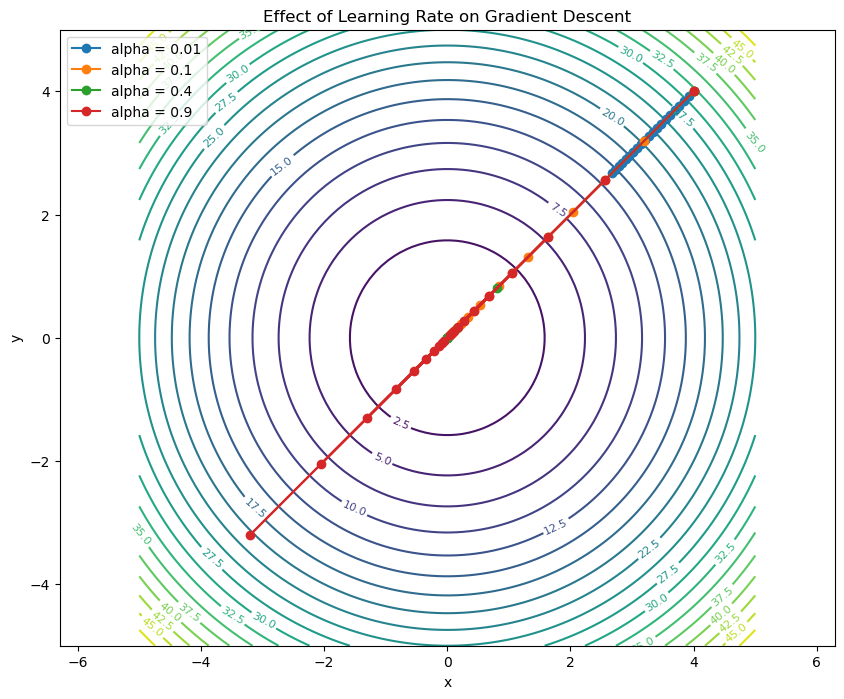

In [49]:
# Different learning rates to try
alphas = [0.01, 0.1, 0.4, 0.9]
start_point = (4, 4)
iterations = 20

plt.figure(figsize=(10, 8))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)

for alpha in alphas:
    path = gradient_descent(grad_f, start_point, alpha, iterations)
    plt.plot(path[:, 0], path[:, 1], '-o', label=f'alpha = {alpha}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Effect of Learning Rate on Gradient Descent')
plt.axis('equal')
plt.legend()
plt.show()